In [1]:
%matplotlib inline

import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


reviews = pd.read_csv(os.path.join("..", "data", "ign.csv"))

# Exercises
All the following exercises are provided with a potential solution to them. All of the proposed problems can be solved in more than one way, so take the solution provided as a reference that can be improved on.

### IGN game reviews dataset


1) Print the worst game genre

2) How many masterpiece (score_phrase == "Masterpiece") game titles were released before April 2001?

3) Print the Platform that the editors choose more often (filter out the platforms with less than 100 games released on them)

4) Load the dataset and print the names of the unique `platform`s, sorted in descending order by the mean score the received over all games released for them. In case of ties in the mean score, sort by the total number of games released on the platform.

5) Find the best awful adventure game (most highly scored with an "Awful" score phrase, Adventure genre game). Take into account all variants of Adventure games, i.e. "Adventure, Platformer', 'Educational, Adventure', etc.

6) Plot the mean score of all games released as a function of the year it was released in.

7) Plot the probability of a game being an editor's choice as a function of score it was given (bin the score values to make the plot).

8) As a follow up of the above exercise, plot the probability of a game being an editor's choice as a function of score but do so for the following platforms: 'PlayStation 4', 'Xbox One' and 'PC'

----

# Solutions

In [2]:
# Ex 1
print(reviews.
      groupby('genre').
      score.mean().
      idxmin()
     )

Hunting, Action


In [3]:
# Ex 2
date_query = ('release_year < 2001 or '
              '(release_year == 2001 and '
              ' release_month < 4)')
print(
    len(
        reviews.
        query("score_phrase=='Masterpiece' and " + date_query).
        title.unique()  # Some titles get released over different platforms
    )
)

171


In [4]:
# Ex 3
print(reviews.
      groupby('platform').
      filter(lambda x: len(x) >= 100).  # Here we keep the platforms with 100 games or more
      groupby('platform').
      score.mean().idxmax()
     )

PlayStation 4


In [5]:
# Ex 4
print(
    reviews.
        groupby(['platform']).
        score.agg(['mean', 'count']).
        sort_values(by=['mean', 'count'],
                    ascending=False).
        index
)

Index(['SteamOS', 'WonderSwan Color', 'Pocket PC', 'Macintosh',
       'TurboGrafx-CD', 'Atari 5200', 'Ouya', 'Web Games', 'Game Boy',
       'New Nintendo 3DS', 'Super NES', 'iPad', 'PlayStation 4', 'Xbox One',
       'Linux', 'Android', 'Wii U', 'PlayStation Vita', 'Dreamcast',
       'NeoGeo Pocket Color', 'Nintendo 3DS', 'iPhone', 'Saturn', 'Xbox',
       'PlayStation 3', 'Wireless', 'PC', 'Lynx', 'Xbox 360', 'GameCube',
       'Sega CD', 'Nintendo 64', 'iPod', 'PlayStation 2', 'Master System',
       'Windows Phone', 'PlayStation Portable', 'N-Gage', 'Windows Surface',
       'Nintendo 64DD', 'Game Boy Advance', 'NES', 'TurboGrafx-16',
       'PlayStation', 'Genesis', 'NeoGeo', 'WonderSwan', 'Commodore 64/128',
       'Nintendo DSi', 'Wii', 'Nintendo DS', 'Vectrex', 'Game Boy Color',
       'Arcade', 'Atari 2600', 'Sega 32X', 'Game.Com', 'Dreamcast VMU',
       'DVD / HD Video Game'],
      dtype='object', name='platform')


In [6]:
# Ex 5
# We first get the indexes of all kinds of adventure genre games
adventurous = (reviews.genre.
                       str.lower().  # To be sure that we will match any case
                       str.contains('adventure').  # If genre contains adventure
                       fillna(False)  # Set false to games that don't have a genre
               )
print(reviews[adventurous].
      query('score_phrase == "Awful"').
      sort_values(by='score', ascending=False).
      title.
      head(1)
     )

5857    Shrek 2
Name: title, dtype: object


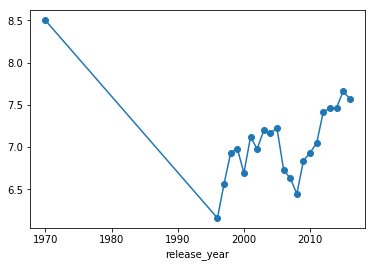

In [7]:
# Ex 6
reviews.groupby('release_year').score.mean().plot(marker='o')

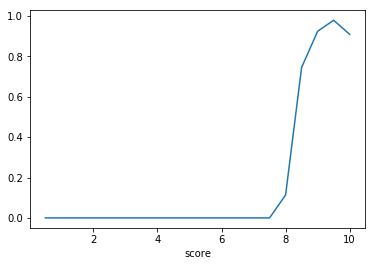

In [8]:
# Ex 7
aprox_scores = np.linspace(0, 10, 21)
binned_score = aprox_scores[np.digitize(reviews.score,
                                        aprox_scores) - 1]
sub = reviews.assign(score=binned_score,
                     editors_choice=reviews.editors_choice == 'Y')
sub.groupby(['score']).editors_choice.mean().plot()

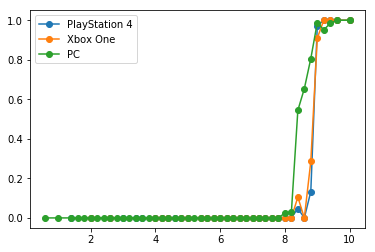

In [9]:
# Ex 8
platforms = ['PlayStation 4', 'Xbox One', 'PC']
aprox_scores = np.linspace(0, 10, 51)
for platform in platforms:
    df = reviews.query('platform == "{}"'.format(platform))
    binned_score = aprox_scores[np.digitize(df.score,
                                            aprox_scores) - 1]
    sub = df.assign(score=binned_score,
                    editors_choice=reviews.editors_choice == 'Y')
    mean = sub.groupby(['score']).editors_choice.mean()
    plt.plot(mean.index.get_values(), mean.values, '-o', label=platform)
plt.legend()